Section 1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, jsonify


Section 2: Load and Inspect Data

In [4]:
# Load the dataset
data = pd.read_excel('C:/Users/Leena Ardini/UPI SUMMER COURSE/Web application assignment 5/Data_Timbulan_Sampah_SIPSN_KLHK.xlsx')

# Display the first few rows to understand the structure
data.head()


,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
1,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
2,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
3,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
4,2023,Aceh,Kab. Simeulue,45.14,16476.21


Section 3: Translate Column Names

In [26]:
# Translate column names to English
data.columns = ['year', 'province', 'district_city', 'daily_waste', 'annual_waste']

# Display the first few rows to confirm changes
data.head()


,year,province,district_city,daily_waste,annual_waste
0,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
1,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
2,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
3,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
4,2023,Aceh,Kab. Simeulue,45.14,16476.21


Section 4: Data Cleaning

In [6]:
# Data Cleaning
data = data.dropna()  # Drop rows with missing values

# Ensure the 'annual_waste' column is numeric
data['annual_waste'] = pd.to_numeric(data['annual_waste'], errors='coerce')

# Drop rows where 'annual_waste' could not be converted to numeric
data = data.dropna(subset=['annual_waste'])


Section 5: Data Processing

In [22]:
#Filtered data to 5 prvince only
filtered_data = data[data['province'].isin(['Aceh', 'Jawa Timur','Riau','Bengkulu','Sumatera Utara'])]

# Total Annual Waste Generation by Province
total_annual_waste = filtered_data.groupby(['province', 'year'])['annual_waste'].sum().reset_index()

# Average Annual Waste Generation by Province
avg_annual_waste = total_annual_waste.groupby('province')['annual_waste'].mean().reset_index()
avg_annual_waste.columns = ['province', 'avg_annual_waste']

# Province with Most Annual Waste Generation Each Year
most_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('year')['annual_waste'].idxmax()]

# Province with Least Annual Waste Generation Each Year
least_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('year')['annual_waste'].idxmin()]


Section 6: Categorization Based on Average Annual Waste

In [23]:
# Categorization based on Average Annual Waste Generation
def categorize_province(avg_waste):
    if avg_waste <= 100000:
        return 'GREEN'
    elif 100000 < avg_waste <= 700000:
        return 'ORANGE'
    else:
        return 'RED'

avg_annual_waste['category'] = avg_annual_waste['avg_annual_waste'].apply(categorize_province)


Section 7: Visualization

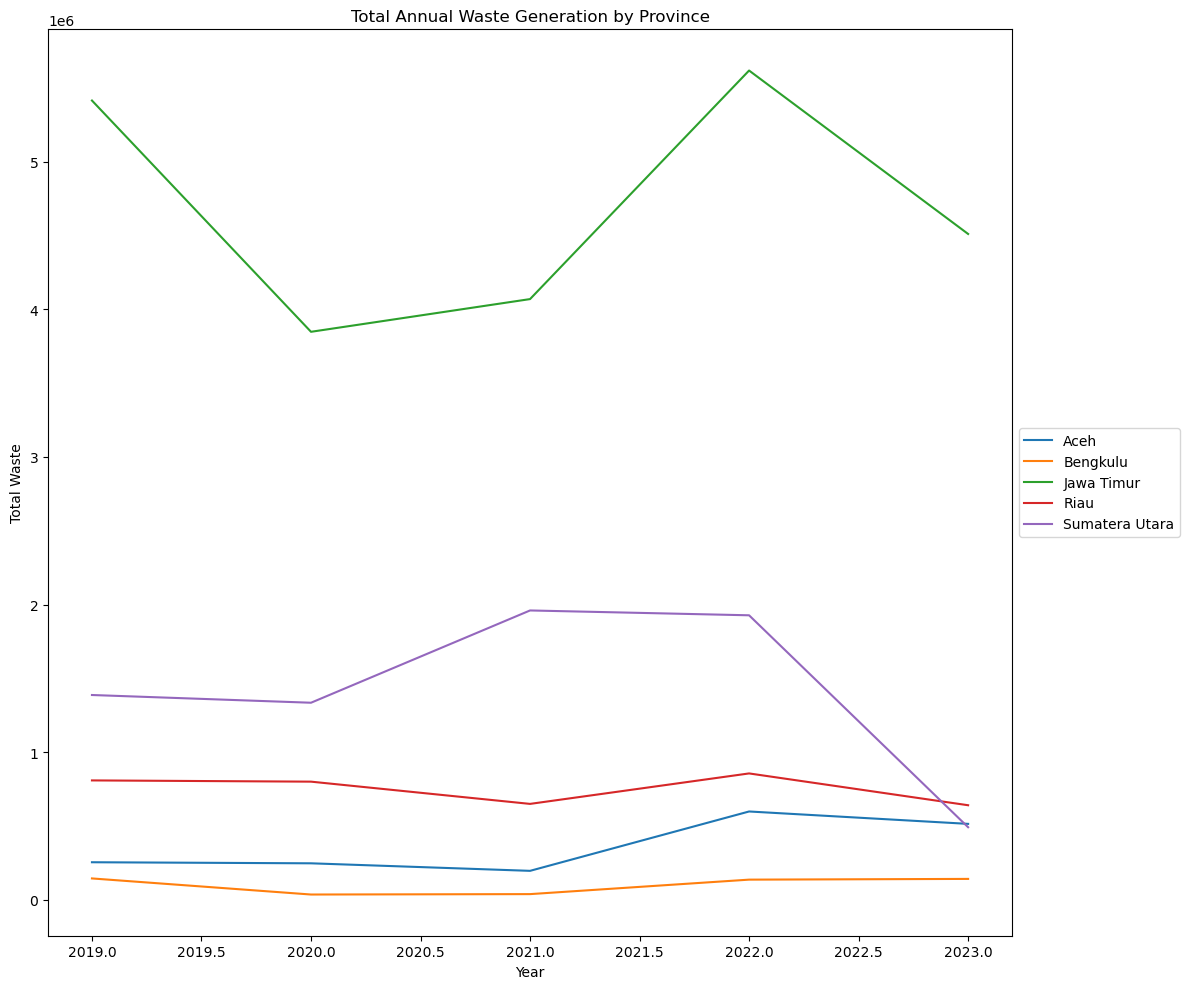

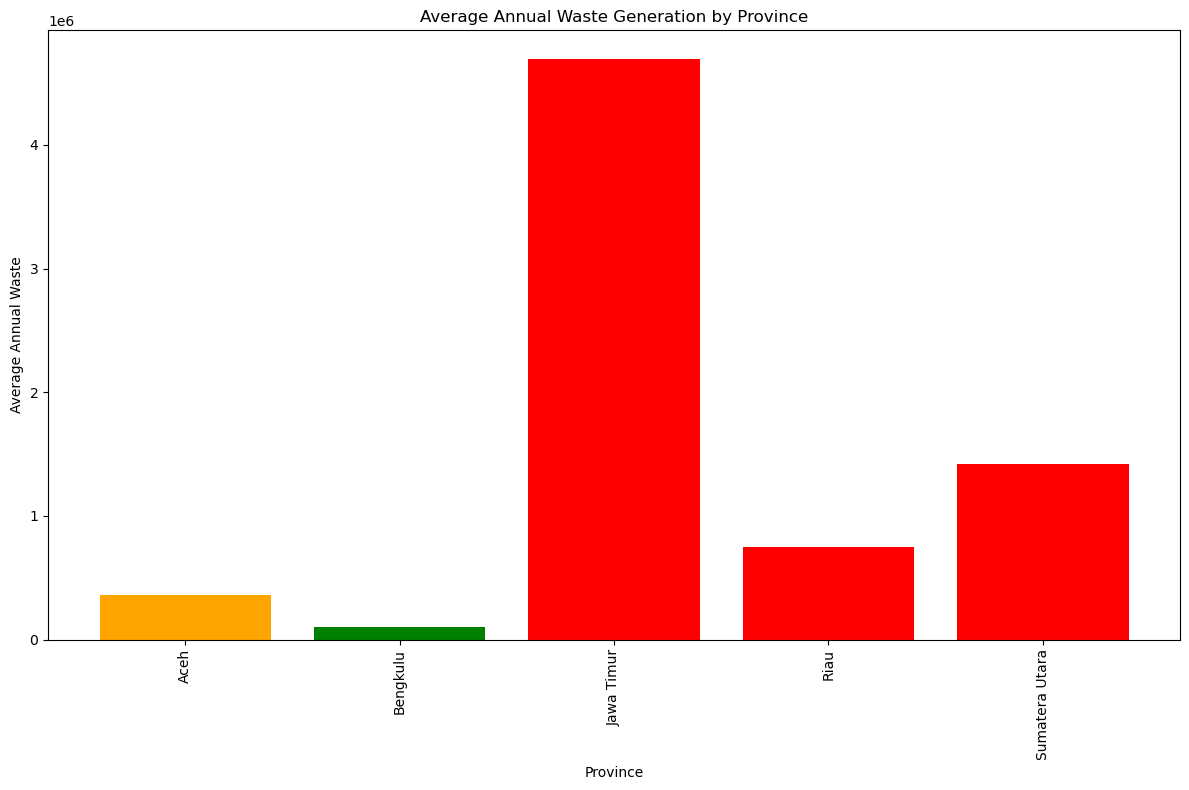

In [24]:
# Visualization
def plot_total_annual_waste(total_annual_waste):
    plt.figure(figsize=(12, 10))  # Increase the height of the graph
    for province in total_annual_waste['province'].unique():
        province_data = total_annual_waste[total_annual_waste['province'] == province]
        plt.plot(province_data['year'], province_data['annual_waste'], label=province)
    plt.xlabel('Year')
    plt.ylabel('Total Waste')
    plt.title('Total Annual Waste Generation by Province')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend outside the graph
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()

def plot_avg_annual_waste(avg_annual_waste):
    plt.figure(figsize=(12, 8))
    colors = avg_annual_waste['category'].map({'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'})
    plt.bar(avg_annual_waste['province'], avg_annual_waste['avg_annual_waste'], color=colors)
    plt.xlabel('Province')
    plt.ylabel('Average Annual Waste')
    plt.title('Average Annual Waste Generation by Province')
    plt.xticks(rotation=90)
    plt.tight_layout()  # Adjust layout to make room for the rotated labels
    plt.show()

plot_total_annual_waste(total_annual_waste)
plot_avg_annual_waste(avg_annual_waste)


Section 8: Flask Web Application Setup

In [30]:
app = Flask(__name__)

@app.route('/')
def index():
    total_waste_data = total_annual_waste.to_dict(orient='records')
    avg_waste_data = avg_annual_waste.to_dict(orient='records')
    return render_template('index.html', total_waste_data=total_waste_data, avg_waste_data=avg_waste_data)

@app.route('/api/total_waste')
def api_total_waste():
    return jsonify(total_annual_waste.to_dict(orient='records'))

@app.route('/api/avg_waste')
def api_avg_waste():
    return jsonify(avg_annual_waste.to_dict(orient='records'))

if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/Jul/2024 19:43:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jul/2024 19:43:02] "GET /api/total_waste HTTP/1.1" 200 -
127.0.0.1 - - [06/Jul/2024 19:43:02] "GET /api/avg_waste HTTP/1.1" 200 -
